In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ADS/Classification')
import adsa_utils as ad


## The Student Dataset

In [ ]:
student = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADS/Classification/assessment_student_dataset.csv', sep=';')
student.head()

,age,Auditory,Kinaesthetic,Visual,Extrinsic Motivation,Intrinsic Motivation,Self-Efficacy,Study Time,Conscientiousness,CAO Points,Maths,English,Pass
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352.0,19.0,45.0,Pass
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187.0,35.0,28.0,Pass
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111.0,21.0,17.0,Pass
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327.0,36.0,46.0,Fail
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274.0,33.0,35.0,Fail


In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1131 non-null   int64  
 1   Auditory              1131 non-null   float64
 2   Kinaesthetic          1131 non-null   float64
 3   Visual                1131 non-null   float64
 4   Extrinsic Motivation  1131 non-null   float64
 5   Intrinsic Motivation  1131 non-null   float64
 6   Self-Efficacy         1131 non-null   float64
 7   Study Time            1131 non-null   float64
 8   Conscientiousness     1131 non-null   float64
 9   CAO Points            1131 non-null   float64
 10  Maths                 1131 non-null   float64
 11  English               1131 non-null   float64
 12  Pass                  1131 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 115.0+ KB


In [ ]:
y = student[['Pass']]
X = student[student.columns.difference(['Pass'])]
#X = X.drop(columns=['ID'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(904, 12) (227, 12) (904, 1) (227, 1)


## Data Preparation
### For sklearn algorithms

In [ ]:
X_enc = X_train.copy()
enc = OrdinalEncoder()
cat_cols = X_enc.select_dtypes(include='object').columns
X_enc[cat_cols] = enc.fit_transform(X_enc[cat_cols])
X_enc.head()
print(X_enc.info())

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 1053 to 255
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Auditory              904 non-null    float64
 1   CAO Points            904 non-null    float64
 2   Conscientiousness     904 non-null    float64
 3   English               904 non-null    float64
 4   Extrinsic Motivation  904 non-null    float64
 5   Intrinsic Motivation  904 non-null    float64
 6   Kinaesthetic          904 non-null    float64
 7   Maths                 904 non-null    float64
 8   Self-Efficacy         904 non-null    float64
 9   Study Time            904 non-null    float64
 10  Visual                904 non-null    float64
 11  age                   904 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 91.8 KB
None


### For xgboost boosting algorithm

In [ ]:
y_enc = y_test.apply(LabelEncoder().fit_transform)
xgb_X = X_train.copy()
object_cols = xgb_X.select_dtypes(include='object').columns
xgb_X[object_cols] = xgb_X[object_cols].astype('category')
xgb_X.info()
y_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 1053 to 255
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Auditory              904 non-null    float64
 1   CAO Points            904 non-null    float64
 2   Conscientiousness     904 non-null    float64
 3   English               904 non-null    float64
 4   Extrinsic Motivation  904 non-null    float64
 5   Intrinsic Motivation  904 non-null    float64
 6   Kinaesthetic          904 non-null    float64
 7   Maths                 904 non-null    float64
 8   Self-Efficacy         904 non-null    float64
 9   Study Time            904 non-null    float64
 10  Visual                904 non-null    float64
 11  age                   904 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 91.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 928 to 467
Data columns (total 1 columns):
 #   Column  Non-Null Count  D

# Ensembles


### Decision Tree Baseline

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=34)
ad.custom_crossvalidation(X_enc, y, dt_clf)

(904, 12)
(904, 1)


ValueError: Found input variables with inconsistent numbers of samples: [904, 1131]

## Bagging

Mean accuracy: 76.74% +/-11.03%
Mean precision: 75.68% +/-12.04%
Mean recall: 74.09% +/-11.26%
Mean F1-score is 74.63% +/-11.62%
              precision    recall  f1-score   support

        Fail       0.71      0.64      0.67       420
        Pass       0.80      0.84      0.82       711

    accuracy                           0.77      1131
   macro avg       0.75      0.74      0.75      1131
weighted avg       0.76      0.77      0.76      1131



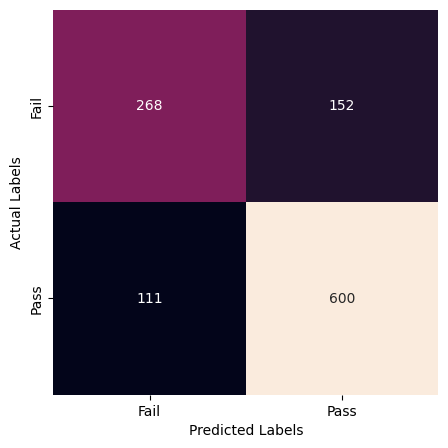

In [ ]:
bag_clf = BaggingClassifier(n_estimators=25, max_samples=0.5, random_state=34)
ad.custom_crossvalidation(X_enc, y, bag_clf)

## Boosting

### scikit-learn AdaBoost

Mean accuracy: 68.16% +/-6.13%
Mean precision: 66.45% +/-6.93%
Mean recall: 64.59% +/-5.13%
Mean F1-score is 64.89% +/-5.61%
              precision    recall  f1-score   support

        Fail       0.58      0.51      0.54       420
        Pass       0.73      0.78      0.76       711

    accuracy                           0.68      1131
   macro avg       0.66      0.65      0.65      1131
weighted avg       0.67      0.68      0.68      1131



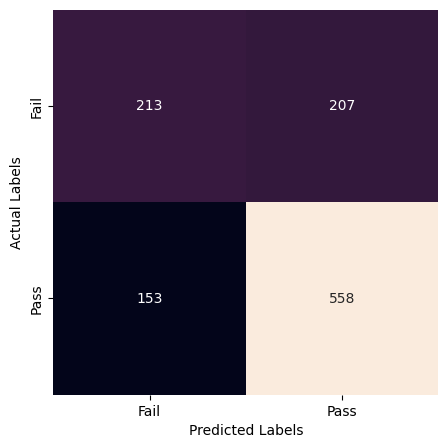

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=200, random_state=34)
ad.custom_crossvalidation(X_enc, y, ada_clf)

### xgb boosting

Mean accuracy: 79.74% +/-10.58%
Mean precision: 78.63% +/-11.65%
Mean recall: 77.65% +/-11.09%
Mean F1-score is 78.05% +/-11.36%
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       420
           1       0.83      0.86      0.84       711

    accuracy                           0.80      1131
   macro avg       0.78      0.78      0.78      1131
weighted avg       0.80      0.80      0.80      1131



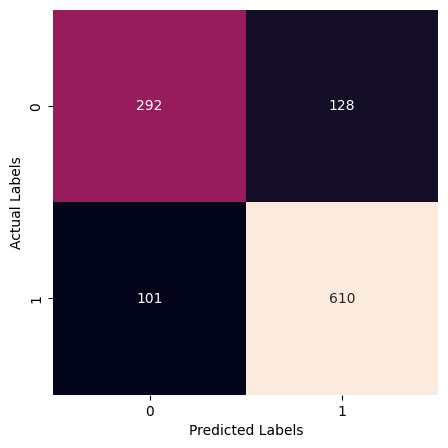

In [ ]:
xgb_clf = XGBClassifier(enable_categorical=True,
           n_estimators=200, random_state=34)
ad.custom_crossvalidation(xgb_X, y_enc, xgb_clf)

## Random Forest

Mean accuracy: 80.19% +/-10.93%
Mean precision: 79.47% +/-12.33%
Mean recall: 77.66% +/-11.34%
Mean F1-score is 78.33% +/-11.75%
              precision    recall  f1-score   support

        Fail       0.76      0.68      0.72       420
        Pass       0.82      0.87      0.85       711

    accuracy                           0.80      1131
   macro avg       0.79      0.78      0.78      1131
weighted avg       0.80      0.80      0.80      1131



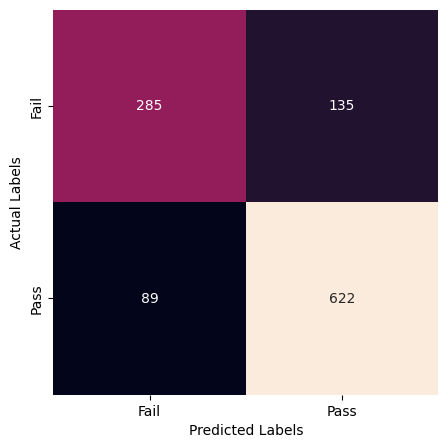

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=34)
ad.custom_crossvalidation(X_enc, y, rf_clf)

## Voting

Default Hyperparameters


Mean accuracy: 82.41% +/-1.71%
Mean precision: 81.88% +/-1.96%
Mean recall: 79.83% +/-2.19%
Mean F1-score is 80.52% +/-2.02%
              precision    recall  f1-score   support

        Fail       0.80      0.70      0.75       333
        Pass       0.84      0.90      0.87       571

    accuracy                           0.82       904
   macro avg       0.82      0.80      0.81       904
weighted avg       0.82      0.82      0.82       904



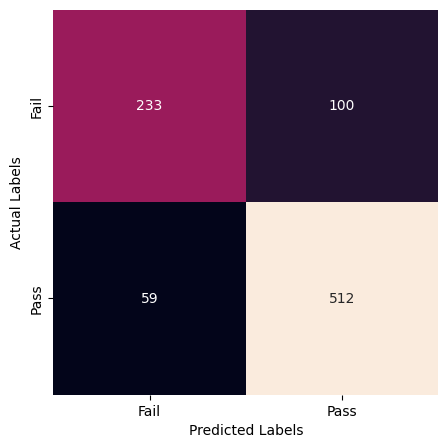

In [ ]:
classifiers = [("c1", DecisionTreeClassifier(random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]
vote_clf = VotingClassifier(estimators=classifiers)
ad.custom_crossvalidation(X_enc, y_train, vote_clf)


#### VotingClassifer hyperparameters, default classifier hyperparameters

Mean accuracy: 80.01% +/-10.75%
Mean precision: 79.17% +/-12.03%
Mean recall: 77.52% +/-11.26%
Mean F1-score is 78.13% +/-11.61%
              precision    recall  f1-score   support

        Fail       0.76      0.68      0.72       420
        Pass       0.82      0.87      0.85       711

    accuracy                           0.80      1131
   macro avg       0.79      0.78      0.78      1131
weighted avg       0.80      0.80      0.80      1131



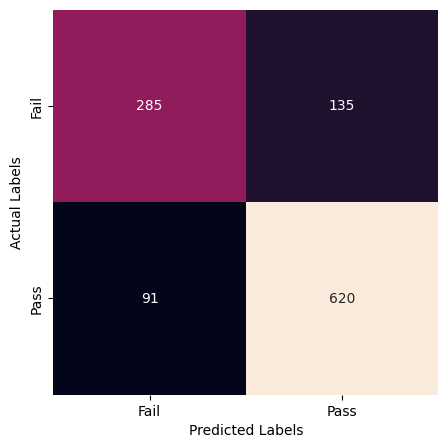

In [ ]:
classifiers = [("c1", DecisionTreeClassifier(random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]
vote_clf = VotingClassifier(estimators=classifiers, voting='hard',  weights=[0,5,2], flatten_transform=True)
ad.custom_crossvalidation(X_enc, y_train, vote_clf)

In [ ]:
classifiers = [("c1", DecisionTreeClassifier(random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]

params = {
    'weights': [[1,2,3],[1,3,5],[5,2,1], [0,5,2]],
    'voting': ['hard', 'soft'],
    'flatten_transform': [True, False]
}
vote_clf = VotingClassifier(estimators=classifiers)
grid_search = GridSearchCV(vote_clf, param_grid=params, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

#ad.custom_crossvalidation(X_enc, y, vote_clf)

{'flatten_transform': True, 'voting': 'soft', 'weights': [1, 2, 3]}
0.812680514188677


Mean accuracy: 83.18% +/-1.76%
Mean precision: 82.96% +/-1.69%
Mean recall: 80.49% +/-2.61%
Mean F1-score is 81.27% +/-2.30%
              precision    recall  f1-score   support

        Fail       0.82      0.70      0.75       333
        Pass       0.84      0.91      0.87       571

    accuracy                           0.83       904
   macro avg       0.83      0.80      0.81       904
weighted avg       0.83      0.83      0.83       904



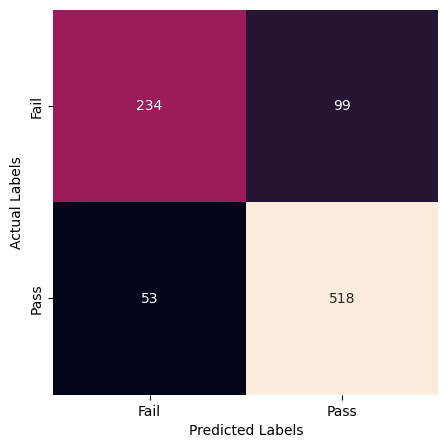

In [ ]:
classifiers = [("c1", DecisionTreeClassifier(random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]
vote_clf = VotingClassifier(estimators=classifiers, voting='soft', weights=[1,2,3], flatten_transform=True)
ad.custom_crossvalidation(X_enc, y_train, vote_clf)

# Modifying all ensemble classifiers hyperparameters


In [ ]:
classifiers = [("c1", DecisionTreeClassifier(random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]

rf_params = {
    'n_estimators' : np.arange(50, 300, 50),
    'criterion': ['gini'],
    'max_depth': range(1, 20, 5),
    'min_impurity_decrease' : np.arange(0.01, 0.3, 0.01)
    #'min_samples_leaf': range(1, 20, 5),
    #'min_samples_split': range(1, 15, 5),
    #'ccp_alpha': [0.006, 0.007, 0.008, 0.009]
}

# xgb_params = {
#     'n_estimators' : np.arange(50, 300, 50),
#     'learning_rate': [0.01, 0.0],
#     'booster': ['gbtree', 'dart'], # retain tree structures only, ignore gblinear
#     'max_depth': range(1, 20, 5),
#     'min_child_weight': range(1,20,5),
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss']
# }

print("RandomForestClassifier GridSearchCV")
rf_clf = RandomForestClassifier(random_state=34)
grid_search = GridSearchCV(rf_clf, param_grid=rf_params, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("RandomForestClassifier: best_params")
print(grid_search.best_params_)
print(grid_search.best_score_)

# print("XGBClassifier GridSearchCV")
# xgb_clf = XGBClassifier(random_state=34)
# grid_search = GridSearchCV(xgb_clf, param_grid=xgb_params, scoring='f1_macro')
# grid_search.fit(X_train, y_train)
# print("XGBClassifier: best_params")
# print(grid_search.best_params_)
# print(grid_search.best_score_)



RandomForestClassifier GridSearchCV
RandomForestClassifier: best_params
{'criterion': 'gini', 'max_depth': 11, 'min_impurity_decrease': 0.01, 'n_estimators': 250}
0.6469884122843232


Applying best parameters from each classifier
 - time constraints and processing power preventing identification of effective hyperparameters using a grid search, as such this was not implemented


In [ ]:
classifiers = [("c1", DecisionTreeClassifier(max_depth=8, min_samples_split=10, max_leaf_nodes=75, min_samples_leaf=15, random_state=43)),
      ("c2", RandomForestClassifier(random_state=34)),
       ("c3", XGBClassifier(random_state=34))
       ]
vote_clf = VotingClassifier(estimators=classifiers, voting='soft', weights=[1,2,3], flatten_transform=True)
ad.custom_crossvalidation(X_enc, y_train, vote_clf)

# Pipeline to execute ensemble method against test dataset

              precision    recall  f1-score   support

        Fail       0.42      0.99      0.59        87
        Pass       0.95      0.15      0.26       140

    accuracy                           0.47       227
   macro avg       0.69      0.57      0.42       227
weighted avg       0.75      0.47      0.39       227



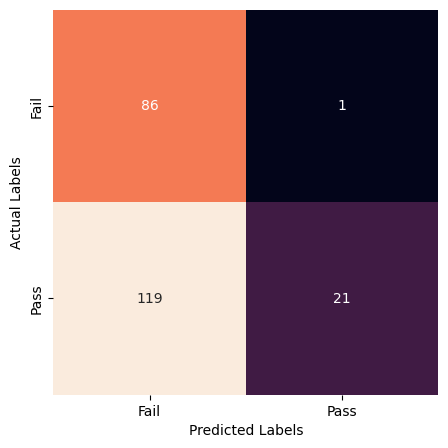

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    # unknown categories are handled by mapping them to -1
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('classifier', vote_clf)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
ad.plot_confusion_matrix(y_test, y_pred)


In [ ]:
print(y_test.value_counts())


Pass
Pass    140
Fail     87
Name: count, dtype: int64



## Stacking

Mean accuracy: 74.80% +/-7.13%
Mean precision: 73.96% +/-8.20%
Mean recall: 72.25% +/-6.38%
Mean F1-score is 72.65% +/-6.97%
              precision    recall  f1-score   support

        Fail       0.67      0.63      0.65       420
        Pass       0.79      0.82      0.80       711

    accuracy                           0.75      1131
   macro avg       0.73      0.72      0.73      1131
weighted avg       0.75      0.75      0.75      1131



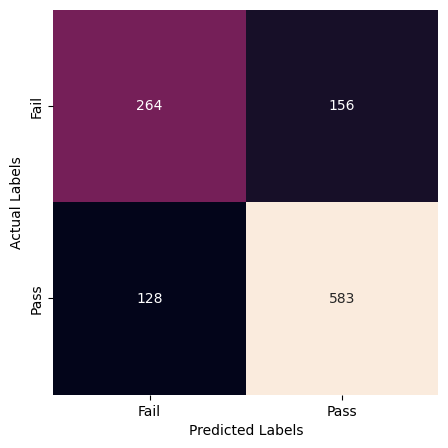

In [ ]:
stack_clf = StackingClassifier(estimators=classifiers,
                               final_estimator=RandomForestClassifier())
ad.custom_crossvalidation(X_enc, y, stack_clf)

# Principal Component Analysis

student after encoding:    age  Auditory  Kinaesthetic    Visual  Extrinsic Motivation  \
0   19  5.000000      6.698392  3.301608              9.308199   
1   31  6.285538      2.500000  6.214462              7.535538   
2   36  6.776966      2.500000  5.723034              8.026966   
3   22  6.756132      3.987737  4.256132              6.621934   
4   23  7.228655      2.228655  5.542690              6.453509   

   Intrinsic Motivation  Self-Efficacy  Study Time  Conscientiousness  \
0              6.875000       7.321865    7.790997           8.721329   
1              6.303307       7.095179    6.892769           6.440564   
2              7.040449       7.258989    7.138483           6.194850   
3              5.945164       5.089465    2.500000           4.042689   
4              6.942836       6.285575    3.314034           4.528460   

   CAO Points  Maths  English  Pass  
0       352.0   19.0     45.0     1  
1       187.0   35.0     28.0     1  
2       111.0   21.0     1

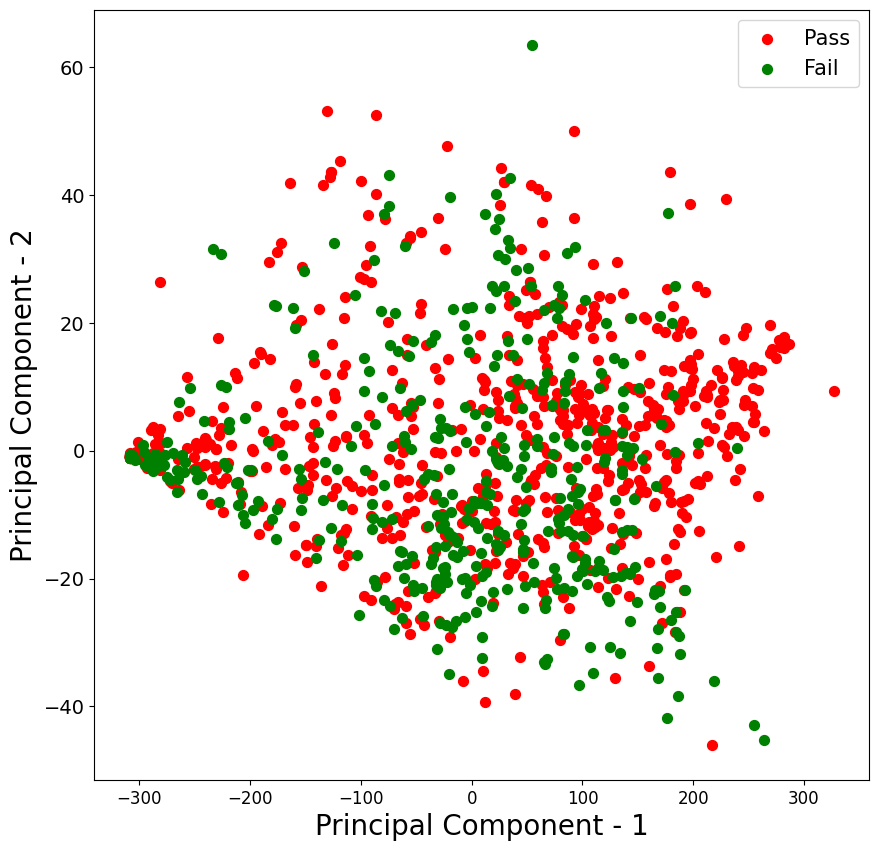

In [ ]:
# Encode the target column
student_encoded = student.copy()
label_encoder = LabelEncoder()
student_encoded['Pass'] = student_encoded['Pass'].map({'Pass': 1, 'Fail': 0})
print(f"student after encoding: {student_encoded.head()}")

# Perform PCA on feature columns only
features = student_encoded.drop(columns=['Pass'])
principalComponents = pca_student.fit_transform(features)

# Create a DataFrame for principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add the target column back
principalDf['Pass'] = student_encoded['Pass'].reset_index(drop=True)

# Debugging: Print unique values in Pass column
print("Unique values in 'Pass':", principalDf['Pass'].unique())

# Visualize the PCA results
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)

targets = [1, 0]  # Numeric values for 'Pass' and 'Fail'
colors = ['r', 'g']
target_names = ['Pass', 'Fail']  # For the legend

for target, color, name in zip(targets, colors, target_names):
    indicesToKeep = principalDf['Pass'] == target
    if indicesToKeep.sum() > 0:  # Check if there are rows to plot
        plt.scatter(
            principalDf.loc[indicesToKeep, 'principal component 1'],
            principalDf.loc[indicesToKeep, 'principal component 2'],
            c=color,
            s=50,
            label=name
        )
    else:
        print(f"No data points for target: {name}")

plt.legend(prop={'size': 15})
plt.show()



In [ ]:
print(principalDf.head())
print(student_encoded['Pass'].head())
print(pca_student.explained_variance_ratio_)
print(pca_student.components_)
pca_student.components_


   principal component 1  principal component 2  Pass
0              46.494215             -19.624471     1
1            -116.738921              12.011243     1
2            -194.714647               7.004724     1
3              23.849599              -1.939010     0
4             -30.171752               1.940526     0
0    1
1    1
2    1
3    0
4    0
Name: Pass, dtype: int64
[0.98221289 0.01117392]
[[-2.70305941e-02  1.11019281e-03 -6.42266830e-05 -1.04596613e-03
  -1.15419655e-03 -1.72802107e-03 -1.19100507e-03  1.73377278e-04
  -2.01783010e-03  9.84003989e-01  1.10747627e-01  1.36851343e-01]
 [ 2.70569902e-02  2.25611624e-03 -7.00964708e-03  4.75353085e-03
   1.46252357e-02  5.25813511e-03  1.35623231e-02  6.95385116e-03
   3.24268429e-03 -6.82456787e-02  9.57377274e-01 -2.78348752e-01]]


array([[-2.70305941e-02,  1.11019281e-03, -6.42266830e-05,
        -1.04596613e-03, -1.15419655e-03, -1.72802107e-03,
        -1.19100507e-03,  1.73377278e-04, -2.01783010e-03,
         9.84003989e-01,  1.10747627e-01,  1.36851343e-01],
       [ 2.70569902e-02,  2.25611624e-03, -7.00964708e-03,
         4.75353085e-03,  1.46252357e-02,  5.25813511e-03,
         1.35623231e-02,  6.95385116e-03,  3.24268429e-03,
        -6.82456787e-02,  9.57377274e-01, -2.78348752e-01]])

Permutation Importance
 - against the training dataset

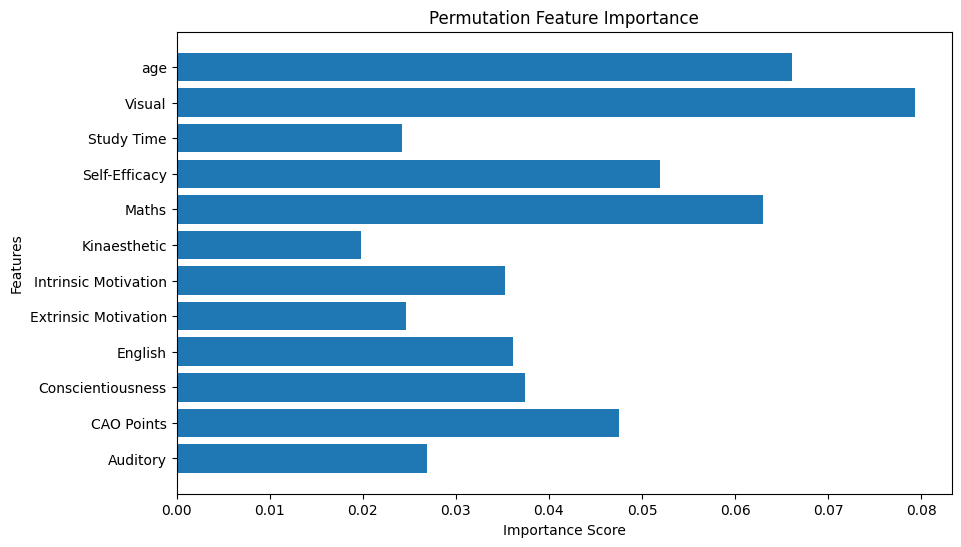

In [ ]:
from sklearn.inspection import permutation_importance

# fit the classifier against the training dataset
vote_clf.fit(X_enc, y_train)
# Calculate permutation importance
result = permutation_importance(vote_clf, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()

Permutation Importance
 - against the test dataset

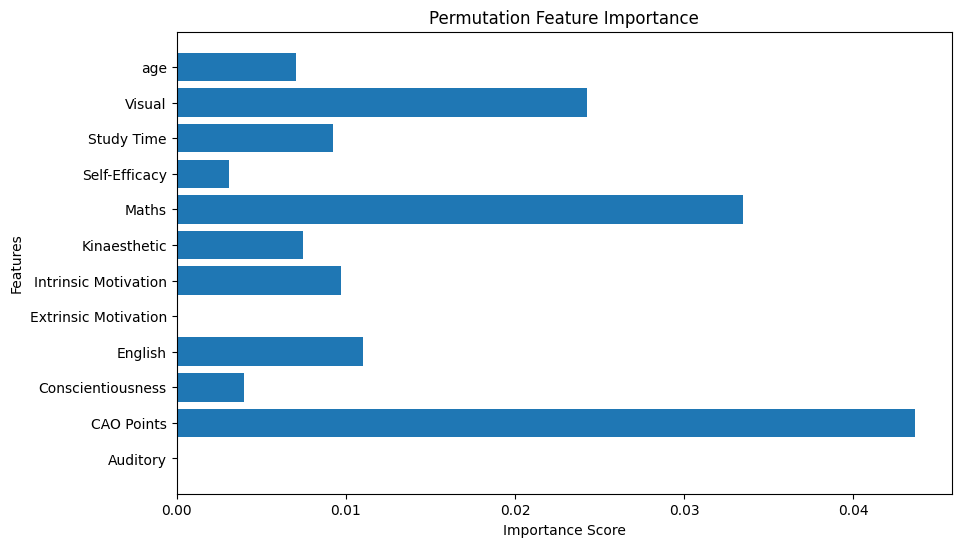

In [ ]:
from sklearn.inspection import permutation_importance

# fit the classifier against the training dataset
vote_clf.fit(X_test, y_pred)
# Calculate permutation importance
result = permutation_importance(vote_clf, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()